**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
# !pip install xgboost
from xgboost import XGBRegressor

**Loading and reading the data**

In [2]:
genom = pd.read_csv("D:\MscDataScience\Teeside\miller2005_genomicMatrix.csv",sep = '\t')

In [3]:
pheno = pd.read_csv("D:\MscDataScience\Teeside\miller2005_public_clinicalMatrix.csv",sep='\t')

In [4]:
pheno.head()

,sampleID,AgeAtDiagnosis,DLDAerror,DSS,DSS.time,ERstatus,EistonHistologicGrade,LymphNodeStatus,PgRstatus,TumorSize,_INTEGRATION,_PATIENT,p53DLDAclassResult,p53mutant,_GENOMIC_ID_miller2005
0,X100B08,68,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR-,9.0,X100B08,X100B08,WT-like,p53-,X100B08
1,X101B88,40,No,AliveOrCensored,12.0,ER-,G3,LN-,PgR-,12.0,X101B88,X101B88,MT-like,p53+,X101B88
2,X102B06,51,No,AliveOrCensored,12.0,ER+,G3,LN-,PgR+,26.0,X102B06,X102B06,MT-like,p53+,X102B06
3,X103B41,52,Yes,NaN,NaN,ER-,G3,LN+,PgR-,22.0,X103B41,X103B41,MT-like,p53-,X103B41
4,X104B91,80,Yes,AliveOrCensored,4.0,ER+,G3,NaN,PgR+,24.0,X104B91,X104B91,WT-like,p53+,X104B91


In [5]:
genom.head()

,probe,X100B08,X101B88,X102B06,X103B41,X104B91,X105B13,X106B55,X10B88,X110B34,...,X85A03,X86A40,X87A79,X88A67,X8B87,X90A63,X94A16,X96A21,X99A50,X9B52
0,211050_x_at,-0.606098,-0.712117,-0.249024,0.473394,-0.549072,-0.309201,0.418973,-0.394657,-0.472516,...,0.194257,-0.014784,0.134075,-0.199902,0.118920,-0.379270,0.820076,-0.045577,-0.024553,0.270666
1,220399_at,0.297762,0.108554,0.529916,-0.023698,-0.240675,-0.186095,0.002805,-0.131806,0.113295,...,0.158997,0.228585,-1.618250,-0.237390,0.228423,-0.433717,-1.760925,0.290775,0.248707,-0.022792
2,202115_s_at,-0.020720,-0.329813,-0.455560,0.335867,0.091474,-0.064934,0.232192,-0.024533,0.390957,...,0.611860,0.303448,0.073593,-0.082835,0.133630,0.055395,0.071154,-0.114437,0.242833,0.218242
3,224501_at,0.019116,-0.508560,0.056202,-0.011279,0.189046,0.696562,0.192982,-0.319991,-0.243859,...,0.209864,0.215092,-0.323448,-0.020308,0.214315,0.212823,0.368002,0.207986,0.267993,0.791909
4,227347_x_at,0.217003,0.750269,0.469504,-0.182406,-0.472260,0.294003,0.147632,0.462857,0.781625,...,-0.792750,0.744523,0.156747,-0.060445,0.107039,-0.192824,0.030753,-0.463569,0.116094,-0.142529


In [6]:
genom.shape

(24711, 252)

In [7]:
genom = genom.swapaxes('columns','index') # changing the axes according to requirement

In [8]:
genom.head()

,0,1,2,3,4,5,6,7,8,9,...,24701,24702,24703,24704,24705,24706,24707,24708,24709,24710
probe,211050_x_at,220399_at,202115_s_at,224501_at,227347_x_at,205483_s_at,212283_at,212285_s_at,217419_x_at,217410_at,...,216922_x_at,208331_at,211461_at,232402_at,207647_at,207646_s_at,207916_at,202829_s_at,214950_at,208164_s_at
X100B08,-0.606098,0.297762,-0.02072,0.019116,0.217003,-0.959766,0.31906,0.267431,0.054625,0.285226,...,0.585269,0.677886,0.294886,0.334739,-0.922423,0.525822,0.65593,-0.373383,0.533709,0.9551
X101B88,-0.712117,0.108554,-0.329813,-0.50856,0.750269,-0.739374,-0.635076,0.404148,0.553476,0.111349,...,0.34349,-0.37717,-0.146836,-0.027103,0.108189,-0.108456,0.800626,0.047387,-0.630866,0.550008
X102B06,-0.249024,0.529916,-0.45556,0.056202,0.469504,0.436696,0.253222,0.236894,0.263844,-0.744438,...,-1.192292,-0.264924,-0.403073,-0.273291,0.408303,0.256424,0.052404,-0.076766,0.170939,-0.016254
X103B41,0.473394,-0.023698,0.335867,-0.011279,-0.182406,0.913891,0.134585,0.468412,0.508557,0.727947,...,0.233813,-0.182134,-0.132613,0.314508,0.147834,-0.766659,-1.517961,0.487872,0.394624,0.440938


In [9]:
genom = genom.rename(columns=genom.iloc[0])

In [10]:
genom = genom.iloc[1: , :]

In [11]:
genom.head()

,211050_x_at,220399_at,202115_s_at,224501_at,227347_x_at,205483_s_at,212283_at,212285_s_at,217419_x_at,217410_at,...,216922_x_at,208331_at,211461_at,232402_at,207647_at,207646_s_at,207916_at,202829_s_at,214950_at,208164_s_at
X100B08,-0.606098,0.297762,-0.02072,0.019116,0.217003,-0.959766,0.31906,0.267431,0.054625,0.285226,...,0.585269,0.677886,0.294886,0.334739,-0.922423,0.525822,0.65593,-0.373383,0.533709,0.9551
X101B88,-0.712117,0.108554,-0.329813,-0.50856,0.750269,-0.739374,-0.635076,0.404148,0.553476,0.111349,...,0.34349,-0.37717,-0.146836,-0.027103,0.108189,-0.108456,0.800626,0.047387,-0.630866,0.550008
X102B06,-0.249024,0.529916,-0.45556,0.056202,0.469504,0.436696,0.253222,0.236894,0.263844,-0.744438,...,-1.192292,-0.264924,-0.403073,-0.273291,0.408303,0.256424,0.052404,-0.076766,0.170939,-0.016254
X103B41,0.473394,-0.023698,0.335867,-0.011279,-0.182406,0.913891,0.134585,0.468412,0.508557,0.727947,...,0.233813,-0.182134,-0.132613,0.314508,0.147834,-0.766659,-1.517961,0.487872,0.394624,0.440938
X104B91,-0.549072,-0.240675,0.091474,0.189046,-0.47226,1.184845,0.204097,0.397236,0.10732,-0.384178,...,-0.063716,-0.051118,-0.149773,-0.304061,-1.229899,-0.000545,0.574513,0.597032,0.196972,0.120323


In [12]:
genom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, X100B08 to X9B52
Columns: 24711 entries, 211050_x_at to 208164_s_at
dtypes: object(24711)
memory usage: 47.3+ MB


In [13]:
genom['AgeAtDiagnosis'] = pheno['AgeAtDiagnosis'].values # adding the potential output variable to the genes dataset

**Checking for Null Values**

In [14]:
genom.isna().sum()

211050_x_at       0
220399_at         0
202115_s_at       0
224501_at         0
227347_x_at       0
                 ..
207916_at         0
202829_s_at       0
214950_at         0
208164_s_at       0
AgeAtDiagnosis    0
Length: 24712, dtype: int64

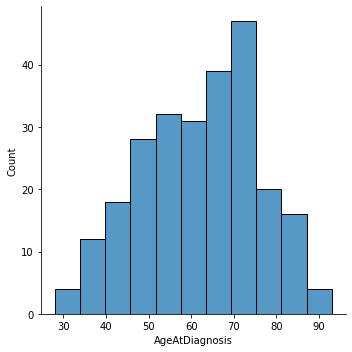

In [15]:
sns.displot(genom['AgeAtDiagnosis'])  # to check if age column has outliers 

In [16]:
updated_genom = genom.drop('AgeAtDiagnosis',axis=1) #dropping the target variable for normalization

In [17]:
updated_genom.shape

(251, 24711)

**Data Normalization**

In [18]:
scaler = preprocessing.MinMaxScaler() # used to convert all values between 0 to 1
names = updated_genom.columns
d = scaler.fit_transform(updated_genom)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,211050_x_at,220399_at,202115_s_at,224501_at,227347_x_at,205483_s_at,212283_at,212285_s_at,217419_x_at,217410_at,...,216922_x_at,208331_at,211461_at,232402_at,207647_at,207646_s_at,207916_at,202829_s_at,214950_at,208164_s_at
0,0.099960,0.664563,0.562653,0.384392,0.717470,0.245858,0.776556,0.657473,0.526237,0.703414,...,0.900654,0.666379,0.587091,0.472368,0.425627,0.799137,0.786029,0.180478,0.856956,0.881233
1,0.062299,0.603485,0.367333,0.153851,0.855080,0.295311,0.371200,0.721069,0.739936,0.625089,...,0.799054,0.226660,0.328070,0.334572,0.632347,0.586170,0.829331,0.403767,0.487282,0.742746
2,0.226805,0.739504,0.287872,0.400594,0.782628,0.559204,0.748586,0.643268,0.615863,0.239591,...,0.153691,0.273441,0.177815,0.240819,0.692544,0.708683,0.605418,0.337883,0.741801,0.549159
3,0.483433,0.560793,0.787985,0.371112,0.614402,0.666279,0.698183,0.750962,0.720693,0.902842,...,0.752966,0.307946,0.336410,0.464664,0.640299,0.365170,0.135469,0.637519,0.812806,0.705458
4,0.120218,0.490751,0.633550,0.458633,0.539604,0.727078,0.727715,0.717854,0.548811,0.401874,...,0.627939,0.362550,0.326348,0.229101,0.363954,0.622402,0.761665,0.695446,0.750065,0.595851


**Feature Selection**

In [19]:
model = ExtraTreesRegressor()
model.fit(scaled_df,genom['AgeAtDiagnosis'])
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.00000000e+00 0.00000000e+00 1.48063910e-05 ... 2.22903723e-06
 0.00000000e+00 1.04021737e-06]


In [20]:
d1 = {'Features': scaled_df.columns, 'Scores':model.feature_importances_}

In [21]:
scores = pd.DataFrame(d1)

In [22]:
scores = scores.sort_values('Scores',ascending=False)

In [23]:
scores['Scores'] = scores['Scores'].round(4)

In [24]:
scores.head()

,Features,Scores
20257,205225_at,0.0267
20035,204165_at,0.0145
16220,222125_s_at,0.0141
20261,211233_x_at,0.0106
20264,217190_x_at,0.0096


In [25]:
df_imp = scores[scores['Scores'] > 0.0] # eliminating features with score 0

In [26]:
df_imp.head()

,Features,Scores
20257,205225_at,0.0267
20035,204165_at,0.0145
16220,222125_s_at,0.0141
20261,211233_x_at,0.0106
20264,217190_x_at,0.0096


In [27]:
imp_cols = list(df_imp['Features'][:])

In [28]:
len(imp_cols)

2919

In [29]:
final_data = scaled_df[list(imp_cols)]

In [30]:
final_data.head()

,205225_at,204165_at,222125_s_at,211233_x_at,217190_x_at,215552_s_at,211234_x_at,213674_x_at,204981_at,201658_at,...,224472_x_at,213661_at,202872_at,207009_at,241705_at,202926_at,220267_at,206263_at,238187_at,211718_at
0,0.857215,0.550850,0.441849,0.332207,0.197973,0.427815,0.445979,0.318053,0.541744,0.445636,...,0.271016,0.941916,0.331599,0.780463,0.413873,0.523538,0.458880,0.298723,0.433034,0.232225
1,0.140083,0.774031,0.032213,0.190636,0.011184,0.070711,0.096640,0.201582,0.361542,0.277523,...,0.259022,0.376908,0.526447,0.755512,0.185255,0.507182,0.372669,0.242400,0.279443,0.863152
2,0.343106,0.645901,0.379965,0.389460,0.561131,0.379205,0.440578,0.404452,0.392672,0.669799,...,0.507634,0.543077,0.219609,0.860727,0.248268,0.691294,0.505349,0.315355,0.426725,0.774338
3,0.135383,0.461381,0.154960,0.588482,0.527286,0.352320,0.383359,0.826634,0.182570,0.322324,...,0.527429,0.228373,0.556683,0.937930,0.694511,0.574131,0.366351,0.091095,0.393525,0.534383
4,0.886196,0.447524,0.211480,0.662139,0.268134,0.636633,0.618434,0.371135,0.576232,0.391618,...,0.449079,0.362237,0.711199,0.410176,0.634115,0.566823,0.313774,0.297817,0.203729,0.000000


In [31]:
X = final_data

In [32]:
y = genom['AgeAtDiagnosis'] 

**Splitting the data into train and test sets**

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=33) 

**Random Forest**

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [40]:
rfc=RandomForestRegressor(random_state=42)

In [44]:
param_grid = { 
    'n_estimators': [100, 200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
#     'criterion' :['gini', 'entropy']
}

In [45]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 400]})

In [47]:
CV_rfc.best_params_

{'max_depth': 6, 'max_features': 'auto', 'n_estimators': 400}

In [48]:
rf = RandomForestRegressor(n_estimators=400,max_depth=6,max_features='auto') 

In [49]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, n_estimators=400)

In [50]:
rf_preds = rf.predict(X_test)

In [51]:
rf_results = r2_score(y_test,rf_preds) 

In [52]:
rf_results

0.23045860689755548

**Linear Regression**

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr_preds = lr.predict(X_test)

In [ ]:
lr_results = r2_score(y_test,lr_preds)

In [ ]:
lr_results

**XGBoost**

In [ ]:
xgb = XGBRegressor()

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
xgb_preds = xgb.predict(X_test)

In [ ]:
xgb_results = r2_score(y_test,xgb_preds)

In [ ]:
xgb_results

**Support Vector Machine**

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm = SVR()

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
svm_preds = svm.predict(X_test)

In [ ]:
svm_results = r2_score(y_test,svm_preds)

In [ ]:
svm_results